In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
import warnings
warnings.simplefilter("ignore")

In [2]:
result_df= pd.read_csv(r"data/results.csv")

In [3]:
stats_df= pd.read_csv(r"data/status.csv")

In [4]:
drivers_df= pd.read_csv(r"data/drivers.csv")

In [5]:
races_df= pd.read_csv(r"data/races.csv")

In [6]:
constructor_df = pd.read_csv(r"data/constructors.csv")

In [7]:
driver_standings= pd.read_csv(r"data/driver_standings.csv")

In [8]:
con1 = pd.merge(result_df, races_df, on ='raceId')
con2 = pd.merge(con1, drivers_df, on = 'driverId')
con3 = pd.merge(con2, driver_standings, on = 'driverId')
con4 = pd.merge(con3, constructor_df, on ='constructorId')
data = pd.merge(con4, stats_df, on ='statusId')
pd.get_option("display.max_columns",None)
data.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,...,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name_y,nationality_y,url,status
0,1,18,1,1,22,1,1,1,1,10.0,...,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,...,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,...,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,...,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,...,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3475793 entries, 0 to 3475792
Data columns (total 54 columns):
 #   Column             Dtype  
---  ------             -----  
 0   resultId           int64  
 1   raceId_x           int64  
 2   driverId           int64  
 3   constructorId      int64  
 4   number_x           object 
 5   grid               int64  
 6   position_x         object 
 7   positionText_x     object 
 8   positionOrder      int64  
 9   points_x           float64
 10  laps               int64  
 11  time_x             object 
 12  milliseconds       object 
 13  fastestLap         object 
 14  rank               object 
 15  fastestLapTime     object 
 16  fastestLapSpeed    object 
 17  statusId           int64  
 18  year               int64  
 19  round              int64  
 20  circuitId          int64  
 21  name_x             object 
 22  date               object 
 23  time_y             object 
 24  url_x              object 
 25  fp1_date          

In [10]:
data = data.drop(["number_x","positionText_x","positionOrder",
                  "date","time_y","url_x","fp1_date","fp1_time","fp2_date","fp2_time","fp3_date","fp3_time","quali_date",
                 "quali_time","sprint_date","sprint_time","number_y","forename","surname","url_y","raceId_y","points_y",
                 "positionText_y","url","nationality_y","code","driverStandingsId","circuitId","round","time_x","rank",
                  "fastestLapTime","position_y","name_y","wins"],1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3475793 entries, 0 to 3475792
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   resultId         int64  
 1   raceId_x         int64  
 2   driverId         int64  
 3   constructorId    int64  
 4   grid             int64  
 5   position_x       object 
 6   points_x         float64
 7   laps             int64  
 8   milliseconds     object 
 9   fastestLap       object 
 10  fastestLapSpeed  object 
 11  statusId         int64  
 12  year             int64  
 13  name_x           object 
 14  driverRef        object 
 15  dob              object 
 16  nationality_x    object 
 17  constructorRef   object 
 18  status           object 
dtypes: float64(1), int64(8), object(10)
memory usage: 530.4+ MB


In [12]:
pd.get_option("display.max_columns",None)
data.head()

,resultId,raceId_x,driverId,constructorId,grid,position_x,points_x,laps,milliseconds,fastestLap,fastestLapSpeed,statusId,year,name_x,driverRef,dob,nationality_x,constructorRef,status
0,1,18,1,1,1,1,10.0,58,5690616,39,218.300,1,2008,Australian Grand Prix,hamilton,1985-01-07,British,mclaren,Finished
1,1,18,1,1,1,1,10.0,58,5690616,39,218.300,1,2008,Australian Grand Prix,hamilton,1985-01-07,British,mclaren,Finished
2,1,18,1,1,1,1,10.0,58,5690616,39,218.300,1,2008,Australian Grand Prix,hamilton,1985-01-07,British,mclaren,Finished
3,1,18,1,1,1,1,10.0,58,5690616,39,218.300,1,2008,Australian Grand Prix,hamilton,1985-01-07,British,mclaren,Finished
4,1,18,1,1,1,1,10.0,58,5690616,39,218.300,1,2008,Australian Grand Prix,hamilton,1985-01-07,British,mclaren,Finished


In [13]:
col_name = {'raceId_x':'racerId','milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
 'name_x':'grand_prix','nationality_x':'nationality','name_y':'company','points_x':'points','position_x':'finish'}
data.rename(columns=col_name,inplace=True)
data.head()

,resultId,racerId,driverId,constructorId,grid,finish,points,laps,timetaken_in_millisec,fastestLap,max_speed,statusId,year,grand_prix,driverRef,dob,nationality,constructorRef,status
0,1,18,1,1,1,1,10.0,58,5690616,39,218.300,1,2008,Australian Grand Prix,hamilton,1985-01-07,British,mclaren,Finished
1,1,18,1,1,1,1,10.0,58,5690616,39,218.300,1,2008,Australian Grand Prix,hamilton,1985-01-07,British,mclaren,Finished
2,1,18,1,1,1,1,10.0,58,5690616,39,218.300,1,2008,Australian Grand Prix,hamilton,1985-01-07,British,mclaren,Finished
3,1,18,1,1,1,1,10.0,58,5690616,39,218.300,1,2008,Australian Grand Prix,hamilton,1985-01-07,British,mclaren,Finished
4,1,18,1,1,1,1,10.0,58,5690616,39,218.300,1,2008,Australian Grand Prix,hamilton,1985-01-07,British,mclaren,Finished


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3475793 entries, 0 to 3475792
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   resultId               int64  
 1   racerId                int64  
 2   driverId               int64  
 3   constructorId          int64  
 4   grid                   int64  
 5   finish                 object 
 6   points                 float64
 7   laps                   int64  
 8   timetaken_in_millisec  object 
 9   fastestLap             object 
 10  max_speed              object 
 11  statusId               int64  
 12  year                   int64  
 13  grand_prix             object 
 14  driverRef              object 
 15  dob                    object 
 16  nationality            object 
 17  constructorRef         object 
 18  status                 object 
dtypes: float64(1), int64(8), object(10)
memory usage: 530.4+ MB


In [15]:
pd.to_datetime(data.dob)
data['dob'] = pd.to_datetime(data['dob'])
from datetime import datetime
dates = datetime.today()-data['dob']
age = dates.dt.days/365
data['age'] = round(age)
pd.set_option('display.max_columns', None)
data=data.drop("dob",1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3475793 entries, 0 to 3475792
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   resultId               int64  
 1   racerId                int64  
 2   driverId               int64  
 3   constructorId          int64  
 4   grid                   int64  
 5   finish                 object 
 6   points                 float64
 7   laps                   int64  
 8   timetaken_in_millisec  object 
 9   fastestLap             object 
 10  max_speed              object 
 11  statusId               int64  
 12  year                   int64  
 13  grand_prix             object 
 14  driverRef              object 
 15  nationality            object 
 16  constructorRef         object 
 17  status                 object 
 18  age                    float64
dtypes: float64(2), int64(8), object(9)
memory usage: 530.4+ MB


In [17]:
l = ['timetaken_in_millisec','fastestLap','max_speed',"finish"]
for i in l:
    data[i] = pd.to_numeric(data[i],errors='coerce')

In [18]:
data.shape

(3475793, 19)

In [19]:
data.isnull().sum() / len(data) * 100

resultId                  0.000000
racerId                   0.000000
driverId                  0.000000
constructorId             0.000000
grid                      0.000000
finish                   35.286106
points                    0.000000
laps                      0.000000
timetaken_in_millisec    61.963788
fastestLap               61.531685
max_speed                61.531685
statusId                  0.000000
year                      0.000000
grand_prix                0.000000
driverRef                 0.000000
nationality               0.000000
constructorRef            0.000000
status                    0.000000
age                       0.000000
dtype: float64

In [20]:
data[["fastestLap"]] = data[["fastestLap"]].fillna(0)
data['timetaken_in_millisec'] = data['timetaken_in_millisec'].fillna(data['timetaken_in_millisec'].mean())
data['max_speed']= data['max_speed'].fillna(data['max_speed'].mean())
data['finish']= data["finish"].fillna(0)

In [21]:
data.isnull().sum() / len(data) * 100

resultId                 0.0
racerId                  0.0
driverId                 0.0
constructorId            0.0
grid                     0.0
finish                   0.0
points                   0.0
laps                     0.0
timetaken_in_millisec    0.0
fastestLap               0.0
max_speed                0.0
statusId                 0.0
year                     0.0
grand_prix               0.0
driverRef                0.0
nationality              0.0
constructorRef           0.0
status                   0.0
age                      0.0
dtype: float64

In [22]:
data_fin = data[data['status'] == 'Finished']
data_fin.tail()
mean = data.max_speed.mean()
mean2 = data.fastestLap.mean()
data = data_fin[data_fin['max_speed']>mean]

data=data[data['fastestLap']>mean2]

data = data[data['points']>0]

data.shape

(381806, 19)

In [23]:
data.skew()

resultId                -0.824252
racerId                 -0.595592
driverId                 0.990641
constructorId            1.494122
grid                     1.124417
finish                   0.386891
points                   0.774719
laps                     0.285256
timetaken_in_millisec    4.443917
fastestLap              -0.263259
max_speed                0.877538
statusId                 0.000000
year                    -0.104641
age                     -0.059872
dtype: float64

In [24]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]
print(data.skew())
print(data.shape)

resultId                -0.348940
racerId                 -0.134272
driverId                 1.156439
constructorId            4.369460
grid                     0.856084
finish                   0.381237
points                   0.960862
laps                     0.128440
timetaken_in_millisec   -0.477745
fastestLap              -0.249842
max_speed                0.847488
statusId                 0.000000
year                     0.274654
age                     -0.295317
dtype: float64
(260289, 19)


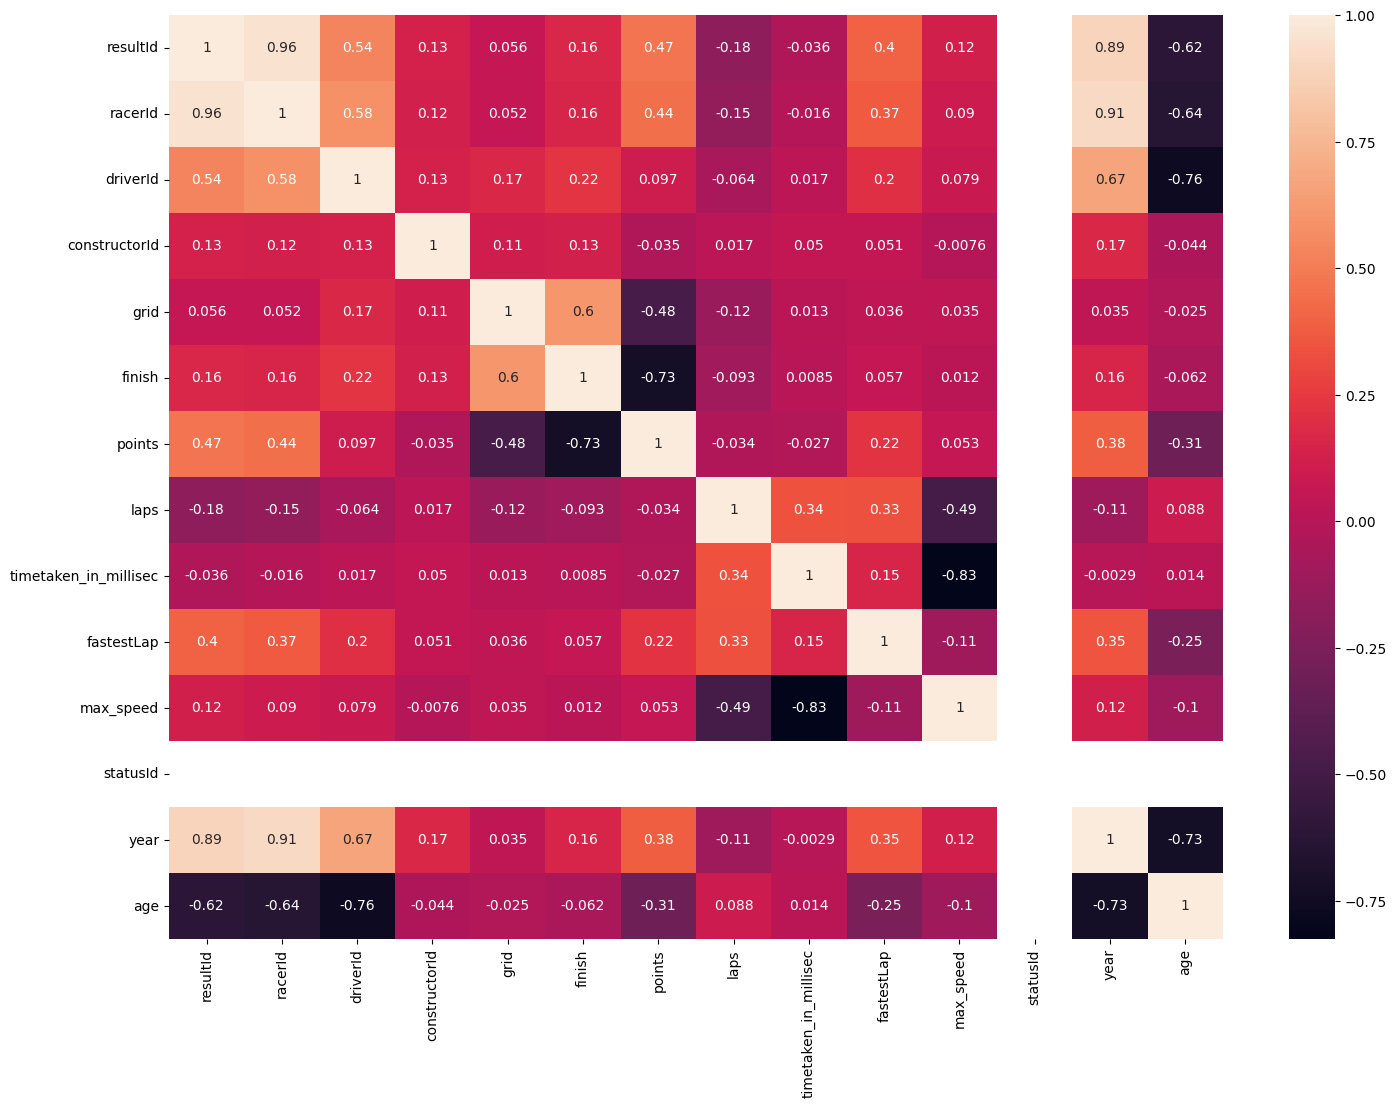

In [25]:
plt.figure(figsize=(17,12))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["nationalityN"] = le.fit_transform(data["nationality"])
data.head()

,resultId,racerId,driverId,constructorId,grid,finish,points,laps,timetaken_in_millisec,fastestLap,max_speed,statusId,year,grand_prix,driverRef,nationality,constructorRef,status,age,nationalityN
0,1,18,1,1,1,1.0,10.0,58,5690616.0,39.0,218.3,1,2008,Australian Grand Prix,hamilton,British,mclaren,Finished,38.0,4
1,1,18,1,1,1,1.0,10.0,58,5690616.0,39.0,218.3,1,2008,Australian Grand Prix,hamilton,British,mclaren,Finished,38.0,4
2,1,18,1,1,1,1.0,10.0,58,5690616.0,39.0,218.3,1,2008,Australian Grand Prix,hamilton,British,mclaren,Finished,38.0,4
3,1,18,1,1,1,1.0,10.0,58,5690616.0,39.0,218.3,1,2008,Australian Grand Prix,hamilton,British,mclaren,Finished,38.0,4
4,1,18,1,1,1,1.0,10.0,58,5690616.0,39.0,218.3,1,2008,Australian Grand Prix,hamilton,British,mclaren,Finished,38.0,4


In [27]:
dataNombres = data.loc[:,['driverRef','driverId']]
dataNombres=dataNombres.drop_duplicates()
dataNacionalidades= data.loc[:,['nationality','nationalityN']]
dataNacionalidades= dataNacionalidades.drop_duplicates()
dataStatus= data.loc[:,['status','statusId']]
dataStatus= dataStatus.drop_duplicates()
dataEquipos=data.loc[:,['constructorRef','constructorId']]
dataEquipos= dataEquipos.drop_duplicates()
dataGP = data.loc[:,['grand_prix',"racerId","year","laps"]]
dataGP= dataGP.drop_duplicates()
print(dataNombres.head())
print(dataNacionalidades.head())
print(dataStatus.head())
print(dataEquipos.head())
print(dataGP.head())

        driverRef  driverId
0        hamilton         1
26124      alonso         4
38759  kovalainen         5
41665   raikkonen         8
59668   coulthard        14
       nationality  nationalityN
0          British             4
26124      Spanish            20
38759      Finnish            10
107910    Austrian             1
107999   Colombian             7
     status  statusId
0  Finished         1
       constructorRef  constructorId
0             mclaren              1
304822     bmw_sauber              2
319114       williams              3
456793         sauber             15
488360        renault              4
                 grand_prix  racerId  year  laps
0     Australian Grand Prix       18  2008    58
311    Malaysian Grand Prix       19  2008    56
622      Spanish Grand Prix       21  2008    66
933      Turkish Grand Prix       22  2008    58
2177      German Grand Prix       27  2008    67


In [28]:
output = pd.DataFrame({"resultId":data.resultId,"racerId":data.racerId,"driverId":data.driverId,
                       "constructorId":data.constructorId,"grid":data.grid,"finish":data.finish,
                       "points":data.points,"laps":data.laps,"timetaken_in_millisec":data.timetaken_in_millisec,
                       "fastestLap":data.fastestLap,"max_speed":data.max_speed,"statusId":data.statusId,
                       "year":data.year,"grand_prix":data.grand_prix,"driverRef":data.driverRef,
                       "nationality":data.nationality,"constructorRef":data.constructorRef,
                       "status":data.status,"age":data.age,"nationalityN":data.nationalityN})



output2 = pd.DataFrame({"driverRef":dataNombres.driverRef,"driverId":dataNombres.driverId})
output3 = pd.DataFrame({"nationality":dataNacionalidades.nationality,"nationalityN":dataNacionalidades.nationalityN})
output4= pd.DataFrame({"status":dataStatus.status,"statusId":dataStatus.statusId})
output5 = pd.DataFrame({"constructorRef":dataEquipos.constructorRef,"constructorId":dataEquipos.constructorId})
output6= pd.DataFrame({"grand_prix":dataGP.grand_prix,"racerId":dataGP.racerId,"year":dataGP.year,"laps":dataGP.laps})

output.to_csv('data.csv',index=False)
output2.to_csv('dataNombres.csv',index=False)
output3.to_csv('dataNacionalidades.csv',index=False)
output4.to_csv('dataStatus.csv',index=False)
output5.to_csv('dataEquipos.csv',index=False)
output6.to_csv('dataGP.csv',index=False)

In [29]:
X= data[["racerId","constructorId","grid","finish","points","laps","timetaken_in_millisec","fastestLap","max_speed","statusId","year","age","nationalityN"]]
y= data['driverId']


In [30]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.4,random_state=42)

In [31]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
cross_valid_scores = {}
parameters=  {
     "max_depth" : [3, 5, 7, 9, 11, 13],
}

model_desicion_tree = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(xtrain, ytrain)

print('-----')
print(f'Best parameters {model_desicion_tree.best_estimator_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_desicion_tree.best_score_
print('-----')

-----
Best parameters DecisionTreeClassifier(class_weight='balanced', max_depth=13, random_state=42)
Mean cross-validated accuracy score of the best_estimator: 0.929
-----


In [33]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_random_forest = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_random_forest.fit(xtrain, ytrain)

print('-----')
print(f'Best parameters {model_random_forest.best_estimator_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_random_forest.best_score_
print('-----')

-----
Best parameters RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=25,
                       random_state=42)
Mean cross-validated accuracy score of the best_estimator: 0.997
-----


In [34]:
from sklearn.model_selection import GridSearchCV
parameters = {
            "weights": ["uniform", "distance"],
              
              }


model_k_neighbors = KNeighborsClassifier(
)

model_k_neighbors = GridSearchCV(
    model_k_neighbors, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_k_neighbors.fit(xtrain, ytrain)

print('-----')
print(f'Best parameters {model_k_neighbors.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_k_neighbors.best_score_:.3f}'
)
cross_valid_scores['k_neighbors'] = model_k_neighbors.best_score_
print('-----')

-----
Best parameters {'weights': 'uniform'}
Mean cross-validated accuracy score of the best_estimator: 1.000
-----


In [35]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1

for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 208231, Test set:52058
Fold:2, Train set: 208231, Test set:52058
Fold:3, Train set: 208231, Test set:52058
Fold:4, Train set: 208231, Test set:52058
Fold:5, Train set: 208232, Test set:52057


In [36]:
score = cross_val_score(RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=20,
                       random_state=42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1.         0.99517845 0.99556264 0.9952745  0.99659988]
Average score: 1.00


In [37]:
score = cross_val_score(KNeighborsClassifier(weights='distance'), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1. 1. 1. 1. 1.]
Average score: 1.00


In [38]:
score = cross_val_score(DecisionTreeClassifier(class_weight='balanced', max_depth=13, random_state=42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.58402167 0.58404088 0.70555918 0.66018671 0.89993661]
Average score: 0.69


In [39]:
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier(class_weight='balanced', max_depth=13, random_state=42)
rn = RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=20,
                       random_state=42)
knn = KNeighborsClassifier(weights='distance')

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.99,random_state=42)

In [41]:
inicio= time.time()
knn.fit(X,y)
ypred= knn.predict(xtest)
fin= time.time()
print(fin-inicio)
print(classification_report(ypred, ytest))
data3= pd.DataFrame(ypred)
data3.head()
data3.rename(columns={0:"driverId"},inplace=True)
data3.head()
m1= pd.merge(data3,dataNombres, on="driverId")
m1.shape
m1.head()
m1["driverRef"].value_counts()

8.215192317962646
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     11083
           2       1.00      1.00      1.00      4999
           3       1.00      1.00      1.00      2645
           4       1.00      1.00      1.00     30019
           5       1.00      1.00      1.00      1541
           7       1.00      1.00      1.00        70
           8       1.00      1.00      1.00     31415
           9       1.00      1.00      1.00      1983
          10       1.00      1.00      1.00       202
          11       1.00      1.00      1.00       736
          12       1.00      1.00      1.00        99
          13       1.00      1.00      1.00     19038
          14       1.00      1.00      1.00      1897
          15       1.00      1.00      1.00      3706
          16       1.00      1.00      1.00      1125
          17       1.00      1.00      1.00     10499
          18       1.00      1.00      1.00     18440
         

raikkonen          31415
alonso             30019
vettel             25156
massa              19038
button             18440
                   ...  
zhou                  46
alguersuari           45
pizzonia              25
brendon_hartley       24
de_vries               8
Name: driverRef, Length: 61, dtype: int64

In [42]:
inicio= time.time()
rn.fit(X,y)
ypred= rn.predict(xtest)
fin= time.time()
print(fin-inicio)
print(classification_report(ypred, ytest))
data3= pd.DataFrame(ypred)
data3.head()
data3.rename(columns={0:"driverId"},inplace=True)
data3.head()
m1= pd.merge(data3,dataNombres, on="driverId")
m1.shape
m1.head()
m1["driverRef"].value_counts()

7.495547533035278
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     11083
           2       1.00      1.00      1.00      4999
           3       1.00      1.00      1.00      2645
           4       1.00      1.00      1.00     30019
           5       1.00      1.00      1.00      1541
           7       1.00      1.00      1.00        70
           8       1.00      1.00      1.00     31415
           9       1.00      1.00      1.00      1983
          10       1.00      1.00      1.00       202
          11       1.00      1.00      1.00       736
          12       1.00      1.00      1.00        99
          13       1.00      1.00      1.00     19038
          14       1.00      1.00      1.00      1897
          15       1.00      1.00      1.00      3706
          16       1.00      1.00      1.00      1125
          17       1.00      1.00      1.00     10499
          18       1.00      1.00      1.00     18440
         

raikkonen          31415
alonso             30019
vettel             24567
massa              19038
button             18440
                   ...  
zhou                  46
alguersuari           45
pizzonia              25
brendon_hartley       24
de_vries               8
Name: driverRef, Length: 61, dtype: int64

In [43]:
inicio= time.time()
dt.fit(X,y)
ypred= dt.predict(xtest)
fin= time.time()
print(fin-inicio)
print(classification_report(ypred, ytest))
data3= pd.DataFrame(ypred)
data3.head()
data3.rename(columns={0:"driverId"},inplace=True)
data3.head()
m1= pd.merge(data3,dataNombres, on="driverId")
m1.shape
m1.head()
m1["driverRef"].value_counts()

1.0670750141143799
              precision    recall  f1-score   support

           1       1.00      0.86      0.92     12957
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00      2645
           4       1.00      1.00      1.00     30019
           5       1.00      1.00      1.00      1541
           7       0.00      0.00      0.00         0
           8       1.00      0.86      0.93     36484
           9       1.00      1.00      1.00      1983
          10       1.00      1.00      1.00       202
          11       1.00      1.00      1.00       736
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00     19038
          14       1.00      1.00      1.00      1897
          15       1.00      1.00      1.00      3706
          16       1.00      1.00      1.00      1125
          17       1.00      1.00      1.00     10499
          18       1.00      1.00      1.00     18440
        

raikkonen             36484
alonso                30019
vettel                22706
massa                 19038
button                18440
max_verstappen        13804
hamilton              12957
perez                 12118
ricciardo             11722
webber                10499
hulkenberg             9722
michael_schumacher     8049
barrichello            7938
fisichella             5437
sainz                  5043
leclerc                4329
trulli                 3706
bottas                 3598
rosberg                2645
ralf_schumacher        2514
kubica                 1983
coulthard              1897
montoya                1700
kovalainen             1541
gasly                  1427
ocon                   1221
sutil                  1125
kvyat                   809
sato                    736
villeneuve              618
kobayashi               617
albon                   607
rosa                    538
panis                   305
liuzzi                  277
giovinazzi          

In [44]:
import joblib

joblib.dump(rn, "rnDriver.joblib")

['rnDriver.joblib']

In [45]:
X1= data[['driverId',"racerId","constructorId","grid","finish","laps","timetaken_in_millisec","fastestLap","max_speed","statusId","year","age","nationalityN"]]
y1= data["points"]

In [46]:
from sklearn.model_selection import train_test_split
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X1, y1,test_size=0.4,random_state=42)

In [47]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
cross_valid_scores = {}
parameters=  {
     "max_depth" : [3, 5, 7, 9, 11, 13],
}

model_desicion_tree = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(xtrain1, ytrain1)

print('-----')
print(f'Best parameters {model_desicion_tree.best_estimator_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_desicion_tree.best_score_
print('-----')

-----
Best parameters DecisionTreeClassifier(class_weight='balanced', max_depth=13, random_state=42)
Mean cross-validated accuracy score of the best_estimator: 1.000
-----


In [49]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_random_forest = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_random_forest.fit(xtrain1, ytrain1)

print('-----')
print(f'Best parameters {model_random_forest.best_estimator_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_random_forest.best_score_
print('-----')

-----
Best parameters RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=15,
                       random_state=42)
Mean cross-validated accuracy score of the best_estimator: 1.000
-----


In [50]:
from sklearn.model_selection import GridSearchCV
parameters = {
            "weights": ["uniform", "distance"],
              
              }


model_k_neighbors = KNeighborsClassifier(
)

model_k_neighbors = GridSearchCV(
    model_k_neighbors, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_k_neighbors.fit(xtrain1, ytrain1)

print('-----')
print(f'Best parameters {model_k_neighbors.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_k_neighbors.best_score_:.3f}'
)
cross_valid_scores['k_neighbors'] = model_k_neighbors.best_score_
print('-----')

-----
Best parameters {'weights': 'uniform'}
Mean cross-validated accuracy score of the best_estimator: 1.000
-----


In [51]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1

for train_index1, test_index1 in kf.split(X1, y1):
    print(f'Fold:{cnt}, Train set: {len(train_index1)}, Test set:{len(test_index1)}')
    cnt+=1

Fold:1, Train set: 208231, Test set:52058
Fold:2, Train set: 208231, Test set:52058
Fold:3, Train set: 208231, Test set:52058
Fold:4, Train set: 208231, Test set:52058
Fold:5, Train set: 208232, Test set:52057


In [52]:
score = cross_val_score(RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=15,
                       random_state=42), X1, y1, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1. 1. 1. 1. 1.]
Average score: 1.00


In [53]:
score = cross_val_score(KNeighborsClassifier(weights='distance'), X1, y1, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1. 1. 1. 1. 1.]
Average score: 1.00


In [54]:
score = cross_val_score(DecisionTreeClassifier(class_weight='balanced', max_depth=13, random_state=42), X1, y1, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1. 1. 1. 1. 1.]
Average score: 1.00


In [55]:
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier(class_weight='balanced', max_depth=13, random_state=42)
rn = RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=20,
                       random_state=42)
knn = KNeighborsClassifier(weights='distance')

In [56]:
from sklearn.model_selection import train_test_split
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X1, y1,test_size=0.99,random_state=42)

In [57]:
inicio= time.time()
knn.fit(X1,y1)
ypred= knn.predict(xtest1)
fin= time.time()
print(fin-inicio)
print(classification_report(ypred, ytest1))

7.249116897583008
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     15958
         2.0       1.00      1.00      1.00     18060
         3.0       1.00      1.00      1.00     12502
         4.0       1.00      1.00      1.00     24163
         5.0       1.00      1.00      1.00     12960
         6.0       1.00      1.00      1.00     28351
         7.0       1.00      1.00      1.00        83
         8.0       1.00      1.00      1.00     32801
         9.0       1.00      1.00      1.00       431
        10.0       1.00      1.00      1.00     34772
        11.0       1.00      1.00      1.00       400
        12.0       1.00      1.00      1.00     21913
        13.0       1.00      1.00      1.00       867
        15.0       1.00      1.00      1.00     20882
        16.0       1.00      1.00      1.00       185
        18.0       1.00      1.00      1.00     15988
        19.0       1.00      1.00      1.00      1481
        2

In [58]:
inicio= time.time()
rn.fit(X1,y1)
ypred= rn.predict(xtest1)
fin= time.time()
print(fin-inicio)
print(classification_report(ypred, ytest1))

4.624337196350098
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     15958
         2.0       1.00      1.00      1.00     18060
         3.0       1.00      1.00      1.00     12502
         4.0       1.00      1.00      1.00     24163
         5.0       1.00      1.00      1.00     12960
         6.0       1.00      1.00      1.00     28351
         7.0       1.00      1.00      1.00        83
         8.0       1.00      1.00      1.00     32801
         9.0       1.00      1.00      1.00       431
        10.0       1.00      1.00      1.00     34772
        11.0       1.00      1.00      1.00       400
        12.0       1.00      1.00      1.00     21913
        13.0       1.00      1.00      1.00       867
        15.0       1.00      1.00      1.00     20882
        16.0       1.00      1.00      1.00       185
        18.0       1.00      1.00      1.00     15988
        19.0       1.00      1.00      1.00      1481
        2

In [59]:
inicio= time.time()
dt.fit(X1,y1)
ypred= dt.predict(xtest1)
fin= time.time()
print(fin-inicio)
print(classification_report(ypred, ytest1))

0.7340521812438965
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     15958
         2.0       1.00      1.00      1.00     18060
         3.0       1.00      1.00      1.00     12502
         4.0       1.00      1.00      1.00     24163
         5.0       1.00      1.00      1.00     12960
         6.0       1.00      1.00      1.00     28351
         7.0       1.00      1.00      1.00        83
         8.0       1.00      1.00      1.00     32801
         9.0       1.00      1.00      1.00       431
        10.0       1.00      1.00      1.00     34772
        11.0       1.00      1.00      1.00       400
        12.0       1.00      1.00      1.00     21913
        13.0       1.00      1.00      1.00       867
        15.0       1.00      1.00      1.00     20882
        16.0       1.00      1.00      1.00       185
        18.0       1.00      1.00      1.00     15988
        19.0       1.00      1.00      1.00      1481
        

In [60]:
joblib.dump(dt, "dtPoints.joblib")

['dtPoints.joblib']

In [61]:
X2= data[['driverId',"racerId","constructorId","grid","laps","timetaken_in_millisec","fastestLap","max_speed","statusId","year","age","nationalityN","points"]]
y2= data["finish"]

In [62]:
from sklearn.model_selection import train_test_split
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, y2,test_size=0.4,random_state=42)

In [63]:
cross_valid_scores = {}
parameters=  {
     "max_depth" : [3, 5, 7, 9, 11, 13],
}

model_desicion_tree = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(xtrain2, ytrain2)

print('-----')
print(f'Best parameters {model_desicion_tree.best_estimator_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_desicion_tree.best_score_
print('-----')

-----
Best parameters DecisionTreeClassifier(class_weight='balanced', max_depth=13, random_state=42)
Mean cross-validated accuracy score of the best_estimator: 1.000
-----


In [64]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_random_forest = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_random_forest.fit(xtrain2, ytrain2)

print('-----')
print(f'Best parameters {model_random_forest.best_estimator_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_random_forest.best_score_
print('-----')

-----
Best parameters RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=10,
                       random_state=42)
Mean cross-validated accuracy score of the best_estimator: 1.000
-----


In [65]:
from sklearn.model_selection import GridSearchCV
parameters = {
            "weights": ["uniform", "distance"],
              
              }


model_k_neighbors = KNeighborsClassifier(
)

model_k_neighbors = GridSearchCV(
    model_k_neighbors, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_k_neighbors.fit(xtrain2, ytrain2)

print('-----')
print(f'Best parameters {model_k_neighbors.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_k_neighbors.best_score_:.3f}'
)
cross_valid_scores['k_neighbors'] = model_k_neighbors.best_score_
print('-----')

-----
Best parameters {'weights': 'uniform'}
Mean cross-validated accuracy score of the best_estimator: 1.000
-----


In [66]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1

for train_index2, test_index2 in kf.split(X2, y2):
    print(f'Fold:{cnt}, Train set: {len(train_index1)}, Test set:{len(test_index1)}')
    cnt+=1

Fold:1, Train set: 208232, Test set:52057
Fold:2, Train set: 208232, Test set:52057
Fold:3, Train set: 208232, Test set:52057
Fold:4, Train set: 208232, Test set:52057
Fold:5, Train set: 208232, Test set:52057


In [67]:
score = cross_val_score(RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=15,
                       random_state=42), X2, y2, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1. 1. 1. 1. 1.]
Average score: 1.00


In [68]:
score = cross_val_score(KNeighborsClassifier(weights='distance'), X2, y2, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1. 1. 1. 1. 1.]
Average score: 1.00


In [69]:
score = cross_val_score(DecisionTreeClassifier(class_weight='balanced', max_depth=13, random_state=42), X2, y2, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1. 1. 1. 1. 1.]
Average score: 1.00


In [70]:
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier(class_weight='balanced', max_depth=13, random_state=42)
rn = RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=20,
                       random_state=42)
knn = KNeighborsClassifier(weights='distance')

In [71]:
from sklearn.model_selection import train_test_split
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, y2,test_size=0.99,random_state=42)

In [72]:
inicio= time.time()
knn.fit(X2,y2)
ypred= knn.predict(xtest2)
fin= time.time()
print(fin-inicio)
print(classification_report(ypred, ytest2))

5.882439851760864
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     33227
         2.0       1.00      1.00      1.00     35007
         3.0       1.00      1.00      1.00     36650
         4.0       1.00      1.00      1.00     35740
         5.0       1.00      1.00      1.00     31051
         6.0       1.00      1.00      1.00     28196
         7.0       1.00      1.00      1.00     22195
         8.0       1.00      1.00      1.00     19698
         9.0       1.00      1.00      1.00      8716
        10.0       1.00      1.00      1.00      7207

    accuracy                           1.00    257687
   macro avg       1.00      1.00      1.00    257687
weighted avg       1.00      1.00      1.00    257687



In [73]:
inicio= time.time()
rn.fit(X2,y2)
ypred= rn.predict(xtest2)
fin= time.time()
print(fin-inicio)
print(classification_report(ypred, ytest2))

3.677990198135376
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     33227
         2.0       1.00      1.00      1.00     35007
         3.0       1.00      1.00      1.00     36650
         4.0       1.00      1.00      1.00     35740
         5.0       1.00      1.00      1.00     31051
         6.0       1.00      1.00      1.00     28196
         7.0       1.00      1.00      1.00     22195
         8.0       1.00      1.00      1.00     19698
         9.0       1.00      1.00      1.00      8716
        10.0       1.00      1.00      1.00      7207

    accuracy                           1.00    257687
   macro avg       1.00      1.00      1.00    257687
weighted avg       1.00      1.00      1.00    257687



In [74]:
inicio= time.time()
dt.fit(X2,y2)
ypred= dt.predict(xtest2)
fin= time.time()
print(fin-inicio)
print(classification_report(ypred, ytest2))

0.7036929130554199
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     33227
         2.0       1.00      1.00      1.00     35007
         3.0       1.00      1.00      1.00     36650
         4.0       1.00      1.00      1.00     35740
         5.0       1.00      1.00      1.00     31051
         6.0       1.00      1.00      1.00     28196
         7.0       1.00      1.00      1.00     22195
         8.0       1.00      1.00      1.00     19698
         9.0       1.00      1.00      1.00      8716
        10.0       1.00      1.00      1.00      7207

    accuracy                           1.00    257687
   macro avg       1.00      1.00      1.00    257687
weighted avg       1.00      1.00      1.00    257687

